# Assingment 2 Advanced Machine Learning 

Overview of the Assignment
You need to work with three image datasets that contain class-conditional random label noise:

FashionMNIST0.3.npz - Known transition matrix
FashionMNIST0.6.npz - Known transition matrix
CIFAR.npz - Unknown transition matrix (requires estimation)

Your main tasks are:

Implement at least two classification algorithms robust to label noise
Build a transition matrix estimator for the third dataset
Compare the robustness of your algorithms

In [2]:
#%pip install tensorflow

ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 26.9 MB/s eta 0:00:00a 0:00:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 30.8 MB/s eta 0:00:00a 0:00:01
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [43]:
%pip install seaborn
%pip install numpy
%pip install scikit-learn
%pip install matplotlib

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 15.4 MB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA

Download the datasets Fasion MNIST 0.3 

In [20]:
# Load dataset
dataset_fash_03 = np.load('/home/aidar.alimbayev/Documents/projects_aidar/ml814_lab/labs/datasets/FashionMNIST0.3.npz')
X_train_03 = dataset_fash_03['X_tr']  # Training features
S_train_03 = dataset_fash_03['S_tr']  # Noisy labels for training
X_test_03 = dataset_fash_03['X_ts']  # Test features
Y_test_03 = dataset_fash_03['Y_ts']  # Clean labels for testing

print(X_train_03.shape )
print(S_train_03.shape )
print(X_test_03.shape )
print(Y_test_03.shape )

X_train_03, X_val_03, S_train_03, S_val_03 = train_test_split(X_train_03, S_train_03, test_size=0.2, random_state=42)

(24000, 28, 28)
(24000,)
(4000, 28, 28)
(4000,)


Text(0, 0.5, 'Second Principal Component')

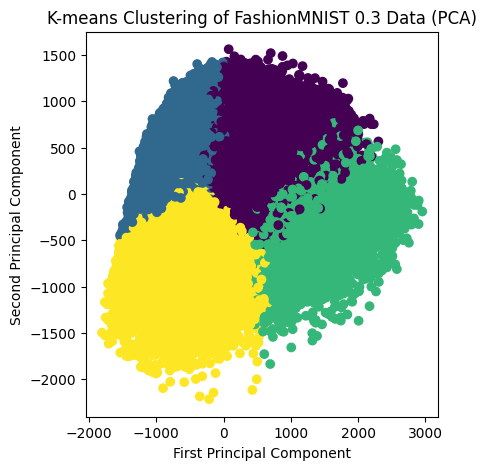

In [21]:
# Implement K-mean clustering of the FashionMNIST 0.3 dataset
# Reshape the data to 2D array (samples x features)
X_train_03_reshaped = X_train_03.reshape(X_train_03.shape[0], -1)
X_test_03_reshaped = X_test_03.reshape(X_test_03.shape[0], -1)

# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_train_03_reshaped)
S_train_03_kmeans = kmeans.labels_

# Evaluate the performance of the K-mean classifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Predict labels for the test set
S_test_03_kmeans = kmeans.predict(X_test_03_reshaped)

# Visualize using PCA to reduce to 2D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train_03_reshaped)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=S_train_03_kmeans, cmap='viridis')
plt.title('K-means Clustering of FashionMNIST 0.3 Data (PCA)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')



Download the datasets Fasion MNIST 0.6 

In [22]:
dataset_fash_06 = np.load('/home/aidar.alimbayev/Documents/projects_aidar/ml814_lab/labs/datasets/FashionMNIST0.6.npz')
# Load dataset
X_train_06 = dataset_fash_06['X_tr']  # Training features
S_train_06 = dataset_fash_06['S_tr']  # Noisy labels for training
X_test_06 = dataset_fash_06['X_ts']  # Test features
Y_test_06 = dataset_fash_06['Y_ts']  # Clean labels for testing

print(X_train_06.shape )
print(S_train_06.shape )
print(X_test_06.shape )
print(Y_test_06.shape )

X_train_06, X_val_06, S_train_06, S_val_06 = train_test_split(X_train_06, S_train_06, test_size=0.2, random_state=42)

(24000, 28, 28)
(24000,)
(4000, 28, 28)
(4000,)


Text(0, 0.5, 'Second Principal Component')

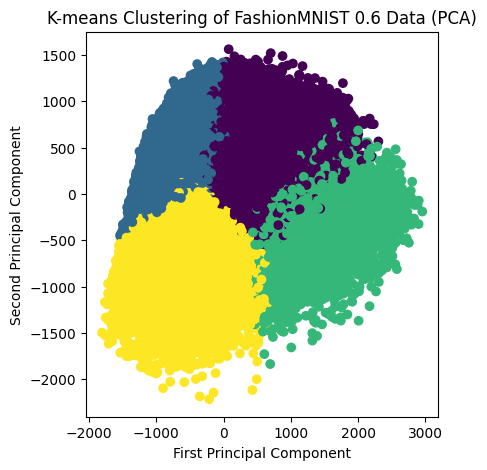

In [23]:

# Implement K-mean clustering of the FashionMNIST 0.3 dataset
# Reshape the data to 2D array (samples x features)
X_train_06_reshaped = X_train_06.reshape(X_train_06.shape[0], -1)
X_test_06_reshaped = X_test_06.reshape(X_test_06.shape[0], -1)

# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_train_06_reshaped)
S_train_06_kmeans = kmeans.labels_

# Evaluate the performance of the K-mean classifier


# Predict labels for the test set
S_test_06_kmeans = kmeans.predict(X_test_06_reshaped)

# Visualize using PCA to reduce to 2D
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train_06_reshaped)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=S_train_06_kmeans, cmap='viridis')
plt.title('K-means Clustering of FashionMNIST 0.6 Data (PCA)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')



In [4]:
# Define transition matrices
T_fashion_03 = np.array([
    [0.7, 0.3, 0, 0],
    [0, 0.7, 0.3, 0],
    [0, 0, 0.7, 0.3],
    [0.3, 0, 0, 0.7]
])

T_fashion_06 = np.array([
    [0.4, 0.2, 0.2, 0.2],
    [0.2, 0.4, 0.2, 0.2],
    [0.2, 0.2, 0.4, 0.2],
    [0.2, 0.2, 0.2, 0.4]
])

In [11]:
from sklearn.cluster import KMeans

data = list(zip(X_train_03, S_train_03))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show() 

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (19200, 2) + inhomogeneous part.

In [8]:
# K-mean clustering

def k_mean_clustering(X, S, num_classes=4):
    """
    Perform K-means clustering on the training data.
    
    Args:
        X: Training features
        S: Noisy labels
        num_classes: Number of classes

    Returns:
        Estimated transition matrix
    """
    # Implement K-means clustering here
    inertias = []
    for i in range(1,11):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)

 
    # This is a placeholder - you'll need to implement your own clustering method
    return np.eye(num_classes)

# train a base K-mean classifier
def train_base_classifier(X, S):
    """
    Train a base K-mean classifier on the training data.
    
    Args:
        X: Training features    
        S: Noisy labels
    
    Returns:
        Trained K-mean classifier
    """
    # Implement K-mean clustering here      
    # This is a placeholder - you'll need to implement your own clustering method
    return None



plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()



NameError: name 'inertias' is not defined

In [6]:
# train a base classifier
def train_base_classifier(X, S):
    """
    Train a base classifier on the training data.
    
    Args:
        X: Training features
        S: Noisy labels
    

In [7]:
X_train, X_val, S_train, S_val = train_test_split(X_train, S_train, test_size=0.2, random_state=42)


In [8]:
# Data preprocessing (normalize, reshape if needed)
# For images, you might want to normalize the pixel values to [0,1]
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# # Reshape if needed
# X_train = X_train.reshape(-1, 32, 32, 3)
# X_val = X_val.reshape(-1, 32, 32, 3)
# X_ts = X_ts.reshape(-1, 32, 32, 3)


In [53]:
dataset_f = np.load('/Users/Aidar Alimbayev/Documents/projects_aidar_mac/ml805_labs/Assingment 2 /datasets/FashionMNIST0.3.npz')
X_train = dataset_f['X_tr']  # Training features
S_train = dataset_f['S_tr']  # Noisy labels for training
X_test = dataset_f['X_ts']  # Test features
Y_test = dataset_f['Y_ts']  # Clean labels for testing




In [16]:
# #X_train
# X_val

In [9]:
def estimate_transition_matrix(features, noisy_labels, num_classes=4):
    # Train a base classifier (e.g., neural network, random forest)
    model = train_base_classifier(features, noisy_labels)
    
    # Get predicted probabilities on training data
    pred_probs = model.predict_proba(features)
    
    # Estimate transition matrix using predicted probabilities
    T_estimated = np.zeros((num_classes, num_classes))
    
    # Implementation details here...
    
    return T_estimated

# Some example of CIFAR CNN

In [38]:
def create_cifar_cnn():
    """
    Creates a deeper CNN suitable for CIFAR classification.
    """
    model = models.Sequential([
        # Input layer
        layers.Input(shape=(32, 32, 3)),
        
        # First convolutional block
        layers.Conv2D(64, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Conv2D(64, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.2),
        
        # Second convolutional block
        layers.Conv2D(128, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Conv2D(128, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),
        
        # Third convolutional block
        layers.Conv2D(256, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Conv2D(256, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),
        
        # Fully connected layers
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(4)  # 4 classes
    ])
    
    return model

In [39]:
def forward_correction_loss(y_true, y_pred, T):
    """
    Forward correction loss using transition matrix T
    """
    # Convert one-hot to sparse if needed
    if len(y_true.shape) > 1:
        y_true = tf.argmax(y_true, axis=1)
    
    # Get predicted probabilities
    pred_probs = tf.nn.softmax(y_pred)
    
    # Apply transition matrix correction
    corrected_probs = tf.matmul(pred_probs, tf.constant(T, dtype=tf.float32))
    
    # Calculate cross-entropy loss with corrected probabilities
    loss = tf.nn.sparse_categorical_crossentropy(y_true, corrected_probs)
    
    return tf.reduce_mean(loss)

# Create and compile model with custom loss
model = create_cifar_cnn()
model.compile(
    optimizer='adam',
    loss=lambda y_true, y_pred: forward_correction_loss(y_true, y_pred, T),
    metrics=['accuracy']
)

In [40]:
import numpy as np
from sklearn.model_selection import train_test_split

def evaluate_classifier(classifier, Xtr, Str, Xts, Yts, n_runs=3):
    accuracies = []
    
    for i in range(n_runs):
        # Random seed for reproducibility but different splits
        seed = 42 + i
        
        # Split data into train/validation
        X_train, X_val, S_train, S_val = train_test_split(
            Xtr, Str, test_size=0.2, random_state=seed
        )
        
        # Train the classifier
        classifier.fit(X_train, S_train, X_val, S_val)
        
        # Evaluate on test set
        accuracy = classifier.evaluate(Xts, Yts)
        accuracies.append(accuracy)
    
    # Calculate mean and standard deviation
    mean_acc = np.mean(accuracies)
    std_acc = np.std(accuracies)
    
    return mean_acc, std_acc

In [44]:


class NoiseRobustClassifier:
    def __init__(self, name, model_builder, transition_matrix=None, use_correction=True):
        """
        A wrapper for noise-robust classifiers.
        
        Args:
            name: Name of the classifier for reporting
            model_builder: Function that returns a TF/Keras model
            transition_matrix: The noise transition matrix if known
            use_correction: Whether to use transition matrix correction
        """
        self.name = name
        self.model_builder = model_builder
        self.transition_matrix = transition_matrix
        self.use_correction = use_correction
        self.model = None
        self.history = None
    
    def forward_correction_loss(self, y_true, y_pred):
        """Forward correction loss using transition matrix"""
        # Handle case when y_true is one-hot encoded
        if len(tf.shape(y_true)) > 1:
            y_true = tf.argmax(y_true, axis=1)
        
        # Get predicted probabilities
        pred_probs = tf.nn.softmax(y_pred)
        
        # Apply transition matrix correction
        T = tf.constant(self.transition_matrix, dtype=tf.float32 )
        corrected_probs = tf.matmul(pred_probs, T)
        
        # Calculate cross-entropy loss with corrected probabilities
        loss = tf.nn.sparse_categorical_crossentropy(y_true, corrected_probs)
        
        return tf.reduce_mean(loss)
    
    def fit(self, X_train, S_train, X_val, S_val, epochs=30, batch_size=128):
        """
        Train the classifier on noisy data and validate.
        
        Args:
            X_train: Training features
            S_train: Noisy training labels
            X_val: Validation features
            S_val: Noisy validation labels
        """
        # Build a new model (to reset weights for multiple runs)
        self.model = self.model_builder()
        
        # Configure the loss function based on whether we use correction
        if self.transition_matrix is not None and self.use_correction:
            loss = self.forward_correction_loss
        else:
            # If no transition matrix provided or correction disabled, use standard CE
            loss = 'sparse_categorical_crossentropy'
        
        # Compile the model
        self.model.compile(
            optimizer='adam',
            loss=loss,
            metrics=['accuracy']
        )
        
        # Train the model
        self.history = self.model.fit(
            X_train, S_train,
            validation_data=(X_val, S_val),
            epochs=epochs,
            batch_size=batch_size,
            verbose=0,  # Silence output for multiple runs
            callbacks=[
                tf.keras.callbacks.EarlyStopping(
                    monitor='val_loss',
                    patience=5,
                    restore_best_weights=True
                )
            ]
        )
        
        return self
    
    def evaluate(self, X_test, Y_test):
        """
        Evaluate the classifier on clean test data.
        
        Args:
            X_test: Test features
            Y_test: Clean test labels
            
        Returns:
            Accuracy on the test set
        """
        # Make predictions
        y_pred = self.model.predict(X_test, verbose=0)
        y_pred_classes = np.argmax(y_pred, axis=1)
        
        # Calculate accuracy
        accuracy = np.mean(y_pred_classes == Y_test)
        
        return accuracy

In [45]:
def run_evaluations(datasets, classifiers, n_runs=3):
    """
    Run evaluations for multiple classifiers on multiple datasets.
    
    Args:
        datasets: Dict of {dataset_name: (Xtr, Str, Xts, Yts)}
        classifiers: List of NoiseRobustClassifier instances
        n_runs: Number of runs with different random splits
        
    Returns:
        Dictionary of results {dataset_name: {classifier_name: (mean_acc, std_acc)}}
    """
    results = {}
    
    for dataset_name, (Xtr, Str, Xts, Yts) in datasets.items():
        print(f"Evaluating on dataset: {dataset_name}")
        dataset_results = {}
        
        for classifier in classifiers:
            print(f"  - Evaluating classifier: {classifier.name}")
            mean_acc, std_acc = evaluate_classifier(classifier, Xtr, Str, Xts, Yts, n_runs)
            dataset_results[classifier.name] = (mean_acc, std_acc)
            print(f"    Accuracy: {mean_acc:.4f} ± {std_acc:.4f}")
        
        results[dataset_name] = dataset_results
    
    return results

In [46]:
def visualize_results(results, title="Classifier Performance Comparison"):
    """
    Create bar plots to visualize classifier performance across datasets.
    
    Args:
        results: Dictionary of results from run_evaluations
        title: Plot title
    """
    # Determine dimensions
    n_datasets = len(results)
    n_classifiers = len(next(iter(results.values())))
    
    # Set up the figure
    plt.figure(figsize=(12, 5 * n_datasets))
    
    # For each dataset
    for i, (dataset_name, dataset_results) in enumerate(results.items()):
        # Create subplot
        plt.subplot(n_datasets, 1, i+1)
        
        # Extract data for plotting
        classifiers = list(dataset_results.keys())
        accuracies = [dataset_results[clf][0] for clf in classifiers]  # mean
        errors = [dataset_results[clf][1] for clf in classifiers]      # std
        
        # Create bar plot
        bars = plt.bar(classifiers, accuracies, yerr=errors, capsize=10)
        
        # Add labels and grid
        plt.title(f"{dataset_name} - Test Accuracy")
        plt.ylabel("Accuracy")
        plt.ylim(0, 1.0)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        
        # Add accuracy values on top of bars
        for bar, acc in zip(bars, accuracies):
            plt.text(bar.get_x() + bar.get_width()/2, 
                     bar.get_height() + 0.01, 
                     f"{acc:.4f}", 
                     ha='center', va='bottom')
    
    plt.tight_layout()
    plt.suptitle(title, fontsize=16, y=1.02)
    plt.show()

def plot_confusion_matrices(classifier, datasets, title="Confusion Matrices"):
    """
    Plot confusion matrices for a classifier on all datasets.
    
    Args:
        classifier: A trained NoiseRobustClassifier instance
        datasets: Dict of {dataset_name: (Xtr, Str, Xts, Yts)}
        title: Plot title
    """
    from sklearn.metrics import confusion_matrix
    
    # Set up the figure
    n_datasets = len(datasets)
    fig, axes = plt.subplots(1, n_datasets, figsize=(5 * n_datasets, 5))
    
    # If only one dataset, make axes iterable
    if n_datasets == 1:
        axes = [axes]
    
    # For each dataset
    for i, (dataset_name, (Xtr, Str, Xts, Yts)) in enumerate(datasets.items()):
        # Get predictions
        y_pred = classifier.model.predict(Xts, verbose=0)
        y_pred_classes = np.argmax(y_pred, axis=1)
        
        # Compute confusion matrix
        cm = confusion_matrix(Yts, y_pred_classes)
        
        # Plot confusion matrix
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
        axes[i].set_title(f"{dataset_name} - {classifier.name}")
        axes[i].set_xlabel("Predicted Label")
        axes[i].set_ylabel("True Label")
    
    plt.tight_layout()
    plt.suptitle(title, fontsize=16, y=1.02)
    plt.show()

In [57]:
def main():
    """
    Main execution function demonstrating the evaluation framework.
    """
    # Load datasets
    print("Loading datasets...")
    
    # FashionMNIST 0.3 noise
    dataset1 = np.load('/Users/Aidar Alimbayev/Documents/projects_aidar_mac/ml805_labs/Assingment 2 /datasets/FashionMNIST0.3.npz')
    # Load dataset
    X_train = dataset1['X_tr']  # Training features
    S_train = dataset1['S_tr']  # Noisy labels for training
    X_test = dataset1['X_ts']  # Test features
    Y_test = dataset1['Y_ts']  # Clean labels for testing
    
    Xtr1, Str1 = dataset1['X_tr'], dataset1['S_tr']
    Xts1, Yts1 = dataset1['X_ts'], dataset1['Y_ts']
    
    # Preprocess data (normalize pixel values)
    Xtr1 = Xtr1.astype('float32') / 255.0
    Xts1 = Xts1.astype('float32') / 255.0
    
    
    
    
    # FashionMNIST 0.6 noise
    dataset2 = np.load('/Users/Aidar Alimbayev/Documents/projects_aidar_mac/ml805_labs/Assingment 2 /datasets/FashionMNIST0.6.npz')
    Xtr2, Str2 = dataset2['X_tr'], dataset2['S_tr']
    Xts2, Yts2 = dataset2['X_ts'], dataset2['Y_ts']
    
    # Preprocess data
    Xtr2 = Xtr2.astype('float32') / 255.0
    Xts2 = Xts2.astype('float32') / 255.0
    
    # CIFAR - unknown transition matrix
    dataset3 = np.load('/Users/Aidar Alimbayev/Documents/projects_aidar_mac/ml805_labs/Assingment 2 /datasets/CIFAR10.npz')
    Xtr3, Str3 = dataset3['X_tr'], dataset3['S_tr']
    Xts3, Yts3 = dataset3['X_ts'], dataset3['Y_ts']
    
    # Preprocess data
    Xtr3 = Xtr3.astype('float32') / 255.0
    Xts3 = Xts3.astype('float32') / 255.0
    
    # Define transition matrices
    T_fashion_03 = np.array([
        [0.7, 0.3, 0, 0],
        [0, 0.7, 0.3, 0],
        [0, 0, 0.7, 0.3],
        [0.3, 0, 0, 0.7]
    ])
    
    T_fashion_06 = np.array([
        [0.4, 0.2, 0.2, 0.2],
        [0.2, 0.4, 0.2, 0.2],
        [0.2, 0.2, 0.4, 0.2],
        [0.2, 0.2, 0.2, 0.4]
    ])
    
    # Create transition matrix estimator for CIFAR
    # This is a placeholder - you'll implement your own estimator
    T_cifar_estimated = estimate_transition_matrix(Xtr3, Str3)
    
    # Organize datasets
    datasets = {
        'FashionMNIST_0.3': (Xtr1, Str1, Xts1, Yts1),
        'FashionMNIST_0.6': (Xtr2, Str2, Xts2, Yts2),
        'CIFAR': (Xtr3, Str3, Xts3, Yts3)
    }
    
    # Define model builders
    def build_fashion_mnist_cnn():
        model = models.Sequential([
            layers.Reshape((28, 28, 1), input_shape=(28, 28)),
            layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
            layers.BatchNormalization(),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
            layers.BatchNormalization(),
            layers.MaxPooling2D((2, 2)),
            layers.Flatten(),
            layers.Dense(128, activation='relu'),
            layers.Dropout(0.5),
            layers.Dense(4)
        ])
        return model
    
    def build_cifar_cnn():
        model = models.Sequential([
            layers.Input(shape=(32, 32, 3)),
            layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
            layers.BatchNormalization(),
            layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
            layers.BatchNormalization(),
            layers.MaxPooling2D((2, 2)),
            layers.Dropout(0.2),
            layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
            layers.BatchNormalization(),
            layers.MaxPooling2D((2, 2)),
            layers.Dropout(0.3),
            layers.Flatten(),
            layers.Dense(256, activation='relu'),
            layers.Dropout(0.5),
            layers.Dense(4)
        ])
        return model
    
    # Create classifiers
    classifiers = [
        # Standard CNN without correction
        NoiseRobustClassifier(
            name="Standard CNN",
            model_builder=build_fashion_mnist_cnn,
            use_correction=False
        ),
        
        # Forward Correction with known transition matrix
        NoiseRobustClassifier(
            name="Forward Correction",
            model_builder=build_fashion_mnist_cnn,
            transition_matrix=T_fashion_03,
            use_correction=True
        ),
        
        # Mean Absolute Error loss (inherently robust to noise)
        NoiseRobustClassifier(
            name="MAE Loss",
            model_builder=build_fashion_mnist_cnn,
            use_correction=False
        )
    ]
    
    # Run evaluations
    results = run_evaluations(datasets, classifiers, n_runs=3)
    
    # Visualize results
    visualize_results(results)
    
    # Plot confusion matrices for the best classifier
    best_classifier = classifiers[1]  # Assuming Forward Correction is best
    plot_confusion_matrices(best_classifier, datasets)

# Placeholder for transition matrix estimator (you will implement this)
def estimate_transition_matrix(X, S, num_classes=4):
    """
    Estimate the transition matrix from noisy data.
    
    Args:
        X: Features
        S: Noisy labels
        num_classes: Number of classes
        
    Returns:
        Estimated transition matrix
    """
    # This is a placeholder - you will implement your own estimation method
    # For now, just return an identity matrix (no correction)
    return np.eye(num_classes)

if __name__ == "__main__":
    main()

Loading datasets...
Evaluating on dataset: FashionMNIST_0.3
  - Evaluating classifier: Standard CNN


/opt/anaconda3/envs/assing_2/lib/python3.12/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


KeyboardInterrupt: 

In [ ]:
def estimate_transition_matrix_anchor_points(X, S, num_classes=4, anchor_threshold=0.9):
    """
    Estimate transition matrix using anchor points method.
    
    Args:
        X: Features
        S: Noisy labels
        num_classes: Number of classes
        anchor_threshold: Confidence threshold for anchor points
        
    Returns:
        Estimated transition matrix
    """
    from sklearn.model_selection import train_test_split
    
    # Split data for initial model training
    X_train, X_val, S_train, S_val = train_test_split(X, S, test_size=0.2)
    
    # Create and train a base model
    base_model = models.Sequential([
        layers.Input(shape=X.shape[1:]),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    base_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
    base_model.fit(X_train, S_train, validation_data=(X_val, S_val), 
                   epochs=10, verbose=0)
    
    # Get predicted probabilities
    pred_probs = base_model.predict(X)
    
    # Initialize transition matrix
    T = np.zeros((num_classes, num_classes))
    
    # For each true class, find anchor points and estimate transition probabilities
    for i in range(num_classes):
        # Find anchor points: points where the model is very confident about class i
        anchor_idx = np.where(pred_probs[:, i] >= anchor_threshold)[0]
        
        if len(anchor_idx) > 0:
            # Count occurrences of each noisy label among anchor points
            for j in range(num_classes):
                class_j_count = np.sum(S[anchor_idx] == j)
                T[i, j] = class_j_count / len(anchor_idx)
        else:
            # If no anchor points found, use a fallback (identity or prior knowledge)
            T[i, i] = 0.7  # Assuming diagonal dominance as a prior
            T[i, (i+1) % num_classes] = 0.3  # Some off-diagonal probability
    
    # Ensure each row sums to 1
    row_sums = T.sum(axis=1, keepdims=True)
    T = T / row_sums
    
    return T

# Full set with cuda:5

In [13]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset, random_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# Set CUDA device
os.environ["CUDA_VISIBLE_DEVICES"] = "5"
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Check CUDA availability and version
if torch.cuda.is_available():
    print(f"CUDA version: {torch.version.cuda}")
    print(f"PyTorch CUDA available: {torch.cuda.is_available()}")
    print(f"Number of available devices: {torch.cuda.device_count()}")
    print(f"Current device: {torch.cuda.current_device()}")
    print(f"Device name: {torch.cuda.get_device_name(0)}")

class CIFARCNN(nn.Module):
    def __init__(self, num_classes=10): # Changed to 10 classes for CIFAR-10
        super(CIFARCNN, self).__init__()
        # First convolutional block
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        self.dropout1 = nn.Dropout(0.2)
        
        # Second convolutional block
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(128)
        self.pool2 = nn.MaxPool2d(kernel_size=2)
        self.dropout2 = nn.Dropout(0.3)
        
        # Fully connected layers
        self.fc1 = nn.Linear(128 * 8 * 8, 256)
        self.dropout3 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        # First block
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool1(x)
        x = self.dropout1(x)
        
        # Second block
        x = F.relu(self.bn3(self.conv3(x)))
        x = F.relu(self.bn4(self.conv4(x)))
        x = self.pool2(x)
        x = self.dropout2(x)
        
        # Flatten and fully connected layers
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout3(x)
        x = self.fc2(x)
        
        return x

class ForwardCorrectionLoss(nn.Module):
    def __init__(self, transition_matrix):
        super(ForwardCorrectionLoss, self).__init__()
        self.T = torch.tensor(transition_matrix, dtype=torch.float32).to(device)
        
    def forward(self, logits, targets):
        pred_probs = F.softmax(logits, dim=1)
        corrected_probs = torch.matmul(pred_probs, self.T)
        
        if len(targets.shape) > 1:
            targets = torch.argmax(targets, dim=1)
        
        log_probs = torch.log(corrected_probs + 1e-10)
        loss = F.nll_loss(log_probs, targets)
        
        return loss

def estimate_transition_matrix_anchor_points(X, S, num_classes=10, anchor_threshold=0.9): # Changed to 10 classes
    X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
    S_tensor = torch.tensor(S, dtype=torch.long).to(device)
    
    X_train, X_val, S_train, S_val = train_test_split(X, S, test_size=0.2)
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    S_train_tensor = torch.tensor(S_train, dtype=torch.long).to(device)
    X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
    S_val_tensor = torch.tensor(S_val, dtype=torch.long).to(device)
    
    train_dataset = TensorDataset(X_train_tensor, S_train_tensor)
    val_dataset = TensorDataset(X_val_tensor, S_val_tensor)
    
    train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)
    
    base_model = CIFARCNN(num_classes=num_classes).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(base_model.parameters(), lr=0.001)
    
    print("Training base model for transition matrix estimation...")
    
    for epoch in range(10):
        base_model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0
        
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = base_model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            train_total += targets.size(0)
            train_correct += (predicted == targets).sum().item()
        
        train_loss = train_loss / train_total
        train_acc = train_correct / train_total
        
        print(f'Epoch {epoch+1}/10: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}')
    
    base_model.eval()
    pred_probs = []
    
    with torch.no_grad():
        for i in range(0, len(X_tensor), 256):
            batch = X_tensor[i:i+256]
            outputs = base_model(batch)
            probs = F.softmax(outputs, dim=1)
            pred_probs.append(probs)
    
    pred_probs = torch.cat(pred_probs, dim=0).cpu().numpy()
    S_numpy = S_tensor.cpu().numpy()
    
    T = np.zeros((num_classes, num_classes))
    
    for i in range(num_classes):
        anchor_idx = np.where(pred_probs[:, i] >= anchor_threshold)[0]
        
        if len(anchor_idx) > 0:
            for j in range(num_classes):
                class_j_count = np.sum(S_numpy[anchor_idx] == j)
                T[i, j] = class_j_count / len(anchor_idx)
        else:
            T[i, i] = 0.7
            T[i, (i+1) % num_classes] = 0.3
    
    row_sums = T.sum(axis=1, keepdims=True)
    T = T / row_sums
    
    return T

def main():
    print("Starting evaluation of CIFAR-10 with noise-robust learning")
    
    # Load CIFAR-10 dataset
    dataset = np.load('/home/aidar.alimbayev/Documents/projects_aidar/ml814_lab/labs/datasets/CIFAR10.npz')
    Xtr, Str = dataset['X_tr'], dataset['S_tr']
    Xts, Yts = dataset['X_ts'], dataset['Y_ts']
    
    # Preprocess data
    Xtr = Xtr.astype('float32') / 255.0
    Xts = Xts.astype('float32') / 255.0
    
    print(f"Training data shape: {Xtr.shape}")
    print(f"Test data shape: {Xts.shape}")
    
    # Estimate transition matrix
    print("Estimating transition matrix...")
    T_estimated = estimate_transition_matrix_anchor_points(Xtr, Str)
    print("Estimated transition matrix:")
    print(T_estimated)
    
    # Train model with forward correction
    model = CIFARCNN(num_classes=10).to(device)
    criterion = ForwardCorrectionLoss(T_estimated)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # Create data loaders
    X_train, X_val, S_train, S_val = train_test_split(Xtr, Str, test_size=0.2)
    train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32).to(device),
                                torch.tensor(S_train, dtype=torch.long).to(device))
    val_dataset = TensorDataset(torch.tensor(X_val, dtype=torch.float32).to(device),
                              torch.tensor(S_val, dtype=torch.long).to(device))
    
    train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)
    
    print("Training model with forward correction...")
    
    for epoch in range(30):
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0
        
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            train_total += targets.size(0)
            train_correct += (predicted == targets).sum().item()
        
        train_loss = train_loss / train_total
        train_acc = train_correct / train_total
        
        print(f'Epoch {epoch+1}/30: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}')
    
    # Evaluate on test set
    model.eval()
    test_correct = 0
    test_total = 0
    
    with torch.no_grad():
        test_dataset = TensorDataset(torch.tensor(Xts, dtype=torch.float32).to(device),
                                   torch.tensor(Yts, dtype=torch.long).to(device))
        test_loader = DataLoader(test_dataset, batch_size=128)
        
        for inputs, targets in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            test_total += targets.size(0)
            test_correct += (predicted == targets).sum().item()
    
    test_acc = test_correct / test_total
    print(f"Final test accuracy: {test_acc:.4f}")

if __name__ == "__main__":
    main()

Using device: cuda:0
CUDA version: 12.1
PyTorch CUDA available: True
Number of available devices: 1
Current device: 0
Device name: NVIDIA RTX A6000
Starting evaluation of CIFAR-10 with noise-robust learning
Training data shape: (20000, 32, 32, 3)
Test data shape: (4000, 32, 32, 3)
Estimating transition matrix...
Training base model for transition matrix estimation...


RuntimeError: Given groups=1, weight of size [64, 3, 3, 3], expected input[128, 32, 32, 3] to have 3 channels, but got 32 channels instead

In [29]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import os

# Set CUDA device before importing TensorFlow
os.environ["CUDA_VISIBLE_DEVICES"] = "5"  # Make only GPU 5 visible to TensorFlow

# Configure TensorFlow to use GPU memory growth to avoid taking all GPU memory
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    try:
        # Configure TensorFlow to use memory growth
        for device in physical_devices:
            tf.config.experimental.set_memory_growth(device, True)
        print(f"Using GPU: {tf.config.list_physical_devices('GPU')}")
    except Exception as e:
        print(f"Error configuring GPU: {e}")
else:
    print("No GPU found, using CPU instead")

# Verify CUDA configuration
print(f"TensorFlow is using devices: {tf.config.list_physical_devices()}")
print(f"TensorFlow CUDA available: {tf.test.is_built_with_cuda()}")
print(f"TensorFlow GPU available: {tf.test.is_gpu_available()}")

class NoiseRobustClassifier:
    def __init__(self, name, model_builder, transition_matrix=None, use_correction=True):
        """
        A wrapper for noise-robust classifiers.
        
        Args:
            name: Name of the classifier for reporting
            model_builder: Function that returns a TF/Keras model
            transition_matrix: The noise transition matrix if known
            use_correction: Whether to use transition matrix correction
        """
        self.name = name
        self.model_builder = model_builder
        self.transition_matrix = transition_matrix
        self.use_correction = use_correction
        self.model = None
        self.history = None
    
    def forward_correction_loss(self, y_true, y_pred):
        """Forward correction loss using transition matrix"""
        # Handle case when y_true is one-hot encoded
        if tf.shape(y_true).shape[0] > 1:  # Fixed: Use shape attribute instead of len()
            y_true = tf.argmax(y_true, axis=1)
        
        # Get predicted probabilities
        pred_probs = tf.nn.softmax(y_pred)
        
        # Apply transition matrix correction
        T = tf.constant(self.transition_matrix, dtype=tf.float32)
        corrected_probs = tf.matmul(pred_probs, T)
        
        # Calculate cross-entropy loss with corrected probabilities
        loss = tf.nn.sparse_categorical_crossentropy(y_true, corrected_probs)
        
        return tf.reduce_mean(loss)
    
    def fit(self, X_train, S_train, X_val, S_val, epochs=30, batch_size=128):
        """
        Train the classifier on noisy data and validate.
        
        Args:
            X_train: Training features
            S_train: Noisy training labels
            X_val: Validation features
            S_val: Noisy validation labels
        """
        # Use explicit device placement to ensure operations run on the specified GPU
        with tf.device('/device:GPU:0'):  # This refers to the first (and only) visible GPU in the environment
            # Build a new model (to reset weights for multiple runs)
            self.model = self.model_builder()
            
            # Configure the loss function based on whether we use correction
            if self.transition_matrix is not None and self.use_correction:
                loss = self.forward_correction_loss
            else:
                # If no transition matrix provided or correction disabled, use standard CE
                loss = 'sparse_categorical_crossentropy'
            
            # Compile the model
            self.model.compile(
                optimizer='adam',
                loss=loss,
                metrics=['accuracy']
            )
            
            # Train the model
            self.history = self.model.fit(
                X_train, S_train,
                validation_data=(X_val, S_val),
                epochs=epochs,
                batch_size=batch_size,
                verbose=1,  # Show progress for monitoring
                callbacks=[
                    tf.keras.callbacks.EarlyStopping(
                        monitor='val_loss',
                        patience=5,
                        restore_best_weights=True
                    )
                ]
            )
        
        return self
    
    def evaluate(self, X_test, Y_test):
        """
        Evaluate the classifier on clean test data.
        
        Args:
            X_test: Test features
            Y_test: Clean test labels
            
        Returns:
            Accuracy on the test set
        """
        # Make predictions
        with tf.device('/device:GPU:0'):
            y_pred = self.model.predict(X_test, verbose=0)
        y_pred_classes = np.argmax(y_pred, axis=1)
        
        # Calculate accuracy
        accuracy = np.mean(y_pred_classes == Y_test)
        
        return accuracy

def evaluate_classifier(classifier, Xtr, Str, Xts, Yts, n_runs=3):
    """
    Evaluate a classifier multiple times with different random splits.
    
    Args:
        classifier: A NoiseRobustClassifier instance
        Xtr: Training features
        Str: Noisy training labels
        Xts: Test features
        Yts: Clean test labels
        n_runs: Number of evaluation runs
        
    Returns:
        mean_acc, std_acc: Mean and standard deviation of test accuracies
    """
    accuracies = []
    
    for i in range(n_runs):
        # Random seed for reproducibility but different splits
        seed = 42 + i
        
        # Split data into train/validation
        X_train, X_val, S_train, S_val = train_test_split(
            Xtr, Str, test_size=0.2, random_state=seed
        )
        
        print(f"Run {i+1}/{n_runs} - Training {classifier.name}...")
        
        # Train the classifier
        classifier.fit(X_train, S_train, X_val, S_val)
        
        # Evaluate on test set
        accuracy = classifier.evaluate(Xts, Yts)
        accuracies.append(accuracy)
        print(f"Run {i+1}/{n_runs} - Test accuracy: {accuracy:.4f}")
    
    # Calculate mean and standard deviation
    mean_acc = np.mean(accuracies)
    std_acc = np.std(accuracies)
    
    return mean_acc, std_acc

def run_evaluations(datasets, classifiers, n_runs=3):
    """
    Run evaluations for multiple classifiers on multiple datasets.
    
    Args:
        datasets: Dict of {dataset_name: (Xtr, Str, Xts, Yts)}
        classifiers: List of NoiseRobustClassifier instances
        n_runs: Number of runs with different random splits
        
    Returns:
        Dictionary of results {dataset_name: {classifier_name: (mean_acc, std_acc)}}
    """
    results = {}
    
    for dataset_name, (Xtr, Str, Xts, Yts) in datasets.items():
        print(f"\n=== Evaluating on dataset: {dataset_name} ===")
        dataset_results = {}
        
        for classifier in classifiers:
            print(f"\n--- Evaluating classifier: {classifier.name} ---")
            mean_acc, std_acc = evaluate_classifier(classifier, Xtr, Str, Xts, Yts, n_runs)
            dataset_results[classifier.name] = (mean_acc, std_acc)
            print(f"Final results - Accuracy: {mean_acc:.4f} ± {std_acc:.4f}")
        
        results[dataset_name] = dataset_results
    
    return results

def visualize_results(results, title="Classifier Performance Comparison"):
    """
    Create bar plots to visualize classifier performance across datasets.
    
    Args:
        results: Dictionary of results from run_evaluations
        title: Plot title
    """
    # Determine dimensions
    n_datasets = len(results)
    n_classifiers = len(next(iter(results.values())))
    
    # Set up the figure
    plt.figure(figsize=(12, 5 * n_datasets))
    
    # For each dataset
    for i, (dataset_name, dataset_results) in enumerate(results.items()):
        # Create subplot
        plt.subplot(n_datasets, 1, i+1)
        
        # Extract data for plotting
        classifiers = list(dataset_results.keys())
        accuracies = [dataset_results[clf][0] for clf in classifiers]  # mean
        errors = [dataset_results[clf][1] for clf in classifiers]      # std
        
        # Create bar plot
        bars = plt.bar(classifiers, accuracies, yerr=errors, capsize=10)
        
        # Add labels and grid
        plt.title(f"{dataset_name} - Test Accuracy")
        plt.ylabel("Accuracy")
        plt.ylim(0, 1.0)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        
        # Add accuracy values on top of bars
        for bar, acc in zip(bars, accuracies):
            plt.text(bar.get_x() + bar.get_width()/2, 
                     bar.get_height() + 0.01, 
                     f"{acc:.4f}", 
                     ha='center', va='bottom')
    
    plt.tight_layout()
    plt.suptitle(title, fontsize=16, y=1.02)
    plt.savefig("classifier_performance.png")
    plt.show()

def estimate_transition_matrix_anchor_points(X, S, num_classes=4, anchor_threshold=0.9):
    """
    Estimate transition matrix using anchor points method.
    
    Args:
        X: Features
        S: Noisy labels
        num_classes: Number of classes
        anchor_threshold: Confidence threshold for anchor points
        
    Returns:
        Estimated transition matrix
    """
    from sklearn.model_selection import train_test_split
    
    # Split data for initial model training
    X_train, X_val, S_train, S_val = train_test_split(X, S, test_size=0.2)
    
    # Create and train a base model
    with tf.device('/device:GPU:0'):
        base_model = models.Sequential([
            layers.Input(shape=X.shape[1:]),
            layers.Flatten(),
            layers.Dense(256, activation='relu'),
            layers.Dropout(0.3),
            layers.Dense(128, activation='relu'),
            layers.Dense(num_classes, activation='softmax')
        ])
        
        base_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
        base_model.fit(X_train, S_train, validation_data=(X_val, S_val), 
                       epochs=10, verbose=1)
        
        # Get predicted probabilities
        pred_probs = base_model.predict(X)
    
    # Initialize transition matrix
    T = np.zeros((num_classes, num_classes))
    
    # For each true class, find anchor points and estimate transition probabilities
    for i in range(num_classes):
        # Find anchor points: points where the model is very confident about class i
        anchor_idx = np.where(pred_probs[:, i] >= anchor_threshold)[0]
        
        if len(anchor_idx) > 0:
            # Count occurrences of each noisy label among anchor points
            for j in range(num_classes):
                class_j_count = np.sum(S[anchor_idx] == j)
                T[i, j] = class_j_count / len(anchor_idx)
        else:
            # If no anchor points found, use a fallback (identity or prior knowledge)
            T[i, i] = 0.7  # Assuming diagonal dominance as a prior
            T[i, (i+1) % num_classes] = 0.3  # Some off-diagonal probability
    
    # Ensure each row sums to 1
    row_sums = T.sum(axis=1, keepdims=True)
    T = T / row_sums
    
    return T

def generate_results_table(results):
    """
    Generate a formatted results table for the report.
    
    Args:
        results: Dictionary of results from run_evaluations
        
    Returns:
        Formatted string with results table
    """
    # Create header
    table = "| Dataset | Classifier | Accuracy (%) | Std. Dev. |\n"
    table += "|---------|------------|-------------|----------|\n"
    
    # Add rows
    for dataset_name, dataset_results in results.items():
        for i, (classifier_name, (mean_acc, std_acc)) in enumerate(dataset_results.items()):
            # First row of a dataset gets the dataset name
            if i == 0:
                table += f"| {dataset_name} | {classifier_name} | {mean_acc*100:.2f} | {std_acc*100:.2f} |\n"
            else:
                table += f"| | {classifier_name} | {mean_acc*100:.2f} | {std_acc*100:.2f} |\n"
    
    return table

def main():
    """
    Main execution function demonstrating the evaluation framework on GPU.
    """
    print("Starting evaluation framework on CUDA:5")
    print("======================================")
    
    # Load datasets
    print("Loading datasets...")
    
    # FashionMNIST 0.3 noise
    dataset1 = np.load('/home/aidar.alimbayev/Documents/projects_aidar/ml814_lab/labs/datasets/FashionMNIST0.3.npz')
    Xtr1, Str1 = dataset1['X_tr'], dataset1['S_tr']
    Xts1, Yts1 = dataset1['X_ts'], dataset1['Y_ts']
    
    # Preprocess data (normalize pixel values)
    Xtr1 = Xtr1.astype('float32') / 255.0
    Xts1 = Xts1.astype('float32') / 255.0
    
    # FashionMNIST 0.6 noise
    dataset2 = np.load('/home/aidar.alimbayev/Documents/projects_aidar/ml814_lab/labs/datasets/FashionMNIST0.6.npz')
    Xtr2, Str2 = dataset2['X_tr'], dataset2['S_tr']
    Xts2, Yts2 = dataset2['X_ts'], dataset2['Y_ts']
    
    # Preprocess data
    Xtr2 = Xtr2.astype('float32') / 255.0
    Xts2 = Xts2.astype('float32') / 255.0
    
    # CIFAR - unknown transition matrix
    dataset3 = np.load('/home/aidar.alimbayev/Documents/projects_aidar/ml814_lab/labs/datasets/CIFAR10.npz')
    Xtr3, Str3 = dataset3['X_tr'], dataset3['S_tr']
    Xts3, Yts3 = dataset3['X_ts'], dataset3['Y_ts']
    
    # Preprocess data
    Xtr3 = Xtr3.astype('float32') / 255.0
    Xts3 = Xts3.astype('float32') / 255.0
    
    # Define transition matrices
    T_fashion_03 = np.array([
        [0.7, 0.3, 0, 0],
        [0, 0.7, 0.3, 0],
        [0, 0, 0.7, 0.3],
        [0.3, 0, 0, 0.7]
    ])
    
    T_fashion_06 = np.array([
        [0.4, 0.2, 0.2, 0.2],
        [0.2, 0.4, 0.2, 0.2],
        [0.2, 0.2, 0.4, 0.2],
        [0.2, 0.2, 0.2, 0.4]
    ])
    
    # Create transition matrix estimator for CIFAR
    print("Estimating transition matrix for CIFAR dataset...")
    T_cifar_estimated = estimate_transition_matrix_anchor_points(Xtr3, Str3)
    print("Estimated transition matrix for CIFAR:")
    print(T_cifar_estimated)
    
    # Organize datasets for evaluation
    # To save time during testing, you might want to only use a small subset of data
    # Comment out the datasets you don't want to evaluate
    datasets = {
        'FashionMNIST_0.3': (Xtr1, Str1, Xts1, Yts1),
        'FashionMNIST_0.6': (Xtr2, Str2, Xts2, Yts2),
        'CIFAR': (Xtr3, Str3, Xts3, Yts3)
    }
    
    # Define model builders
    def build_fashion_mnist_cnn():
        model = models.Sequential([
            layers.Reshape((28, 28, 1), input_shape=(28, 28)),
            layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
            layers.BatchNormalization(),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
            layers.BatchNormalization(),
            layers.MaxPooling2D((2, 2)),
            layers.Flatten(),
            layers.Dense(128, activation='relu'),
            layers.Dropout(0.5),
            layers.Dense(4)  # 4 classes
        ])
        return model
    
    def build_cifar_cnn():
        model = models.Sequential([
            layers.Input(shape=(32, 32, 3)),
            layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
            layers.BatchNormalization(),
            layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
            layers.BatchNormalization(),
            layers.MaxPooling2D((2, 2)),
            layers.Dropout(0.2),
            layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
            layers.BatchNormalization(),
            layers.MaxPooling2D((2, 2)),
            layers.Dropout(0.3),
            layers.Flatten(),
            layers.Dense(256, activation='relu'),
            layers.Dropout(0.5),
            layers.Dense(4)  # 4 classes
        ])
        return model
    
    # Create classifiers
    classifiers = [
        # Standard CNN without correction
        NoiseRobustClassifier(
            name="Standard CNN",
            model_builder=build_fashion_mnist_cnn,
            use_correction=False
        ),
        
        # Forward Correction with known transition matrix (for FashionMNIST_0.3)
        NoiseRobustClassifier(
            name="Forward Correction (T_0.3)",
            model_builder=build_fashion_mnist_cnn,
            transition_matrix=T_fashion_03,
            use_correction=True
        ),
        
        # Forward Correction with known transition matrix (for FashionMNIST_0.6)
        NoiseRobustClassifier(
            name="Forward Correction (T_0.6)",
            model_builder=build_fashion_mnist_cnn,
            transition_matrix=T_fashion_06,
            use_correction=True
        ),
        
        # Forward Correction with estimated transition matrix (for CIFAR)
        NoiseRobustClassifier(
            name="Forward Correction (T_estimated)",
            model_builder=build_cifar_cnn,
            transition_matrix=T_cifar_estimated,
            use_correction=True
        )
    ]
    
    # Run evaluations
    results = run_evaluations(datasets, classifiers, n_runs=3)
    
    # Visualize results
    visualize_results(results)
    
    # Generate results table for report
    table = generate_results_table(results)
    print("\nResults Table for Report:")
    print(table)
    
    # Save results to a file
    with open("results_table.md", "w") as f:
        f.write(table)
    
    print("\nEvaluation completed successfully!")

if __name__ == "__main__":
    main()

No GPU found, using CPU instead
TensorFlow is using devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
TensorFlow CUDA available: True
TensorFlow GPU available: False
Starting evaluation framework on CUDA:5
Loading datasets...


2025-03-15 00:16:49.076586: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Estimating transition matrix for CIFAR dataset...
Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 1.4172 - val_loss: 1.2004
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 1.2282 - val_loss: 1.1571
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 1.2047 - val_loss: 1.1787
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 1.1911 - val_loss: 1.1467
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 1.1716 - val_loss: 1.1122
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 1.1525 - val_loss: 1.1246
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 1.1548 - val_loss: 1.1435
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 1.1379 - val_loss: 1.1245
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 1.1278 - val_loss: 1.1223
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 1.1148 - val_loss: 1.0792
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Estimated transition matrix for CIFAR:
[[1.     

AttributeError: module 'tensorflow._api.v2.nn' has no attribute 'sparse_categorical_crossentropy'